**Load the training dataset**

In [236]:
import glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x_train = []
y_train = []

pos_path = './data/aclImdb/train/pos/*.txt'
neg_path = './data/aclImdb/train/neg/*.txt'

# Populate the training dataset
for file_path in glob.glob(pos_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        x_train.append(file.read())
        y_train.append(1)
        
for file_path in glob.glob(neg_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        x_train.append(file.read())
        y_train.append(0)

In [237]:
len(x_train)

25000

In [238]:
len(y_train)

25000

**Loading the test dataset**

In [239]:
x_train[1258]

'Jon Voight plays a man named Joe. Joe is shook up by a haunting childhood. He has a strong fear and hatred of religion due to his traumatic baptism. He quits his job as a dishwasher and goes out to become a hustler for wealthy people. He meets a misfit named Ratso(Dustin Hoffman) and the two for a relationship. They go out and work together in helping each other out. They become thieves. The two grow remarkably close and soon can\'t live without each other. However, there is something very important that Ratso hasn\'t told Joe, and it could destroy any hope they have of surviving the city together. This is one of the greatest films ever made. It is a heartbreaking and shattering portrait of too very lonely men who have nothing to lose but each other. Their story is devastating to watch, but is ultimately important for people to see. It\'s one of those films where the characters are pretty much just like the seemingly crazy people you sometimes find on the street. The difference is tha

In [240]:
test_pos_path = './data/aclImdb/test/pos/*.txt'
test_neg_path = './data/aclImdb/test/neg/*.txt'

x_test = []
y_test = []

# Populate the test dataset
for file_path in glob.glob(test_pos_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        x_test.append(file.read())
        y_test.append(1)
        
for file_path in glob.glob(test_neg_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        x_test.append(file.read())
        y_test.append(0)

print(len(x_test))
print(len(y_test))

25000
25000


In [241]:
x_test[1258]

'A recent survey of children in the UK re-enforced the notion put forth by this film 27 years ago. That being more than anything else, young people want to grow up to be somebody famous. It used to be doctors and firemen that kids wanted to be. Now, everyone wants to be famous. Fame is a story of a group of kids accepted into the High School for Performing Arts in New York City. We seen them first audition, then take classes and learn about life for the next four years. The film has a lot of fine qualities, but ultimately leaves you feeling a little unsatisfied.<br /><br />Alan Parker\'s bold directorial style fits the story pretty well. The film has been classified as a musical, but more than anything it is a drama. Musical numbers and dance routines break out here and there, and Parker keeps them as close to realistic as they really could have been filmed. The acting is for the most part top-drawer with a few exceptions. The pacing is a little off, particularly toward the end of the 

**The IMDB movie review dataset consists of 50,000 reviews which is split into 25,000 train and 25,000 test reviews. Each of the train and test sets have been equally divided into 12,500 positive and negative reviews.**

**The reviews have unnecessary html tags and punctuations present which will be removed by using regular expressions.** 

In [242]:
import re

def cleanup_text(reviews):
    cleaned_reviews = []
    
    for review in reviews:
        review = re.sub(r'<.*?>', '', review)  # remove html tags first
        cleaned_text = re.sub(r'[^\w\s]', '', review)
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text) # remove whitespace
        cleaned_text = cleaned_text.lower() # convert to lowercase
        cleaned_reviews.append(cleaned_text)
        
    return cleaned_reviews

x_train_cleaned = cleanup_text(x_train)
x_test_cleaned = cleanup_text(x_test)
        
    
x_test_cleaned[1258]

'a recent survey of children in the uk reenforced the notion put forth by this film 27 years ago that being more than anything else young people want to grow up to be somebody famous it used to be doctors and firemen that kids wanted to be now everyone wants to be famous fame is a story of a group of kids accepted into the high school for performing arts in new york city we seen them first audition then take classes and learn about life for the next four years the film has a lot of fine qualities but ultimately leaves you feeling a little unsatisfiedalan parkers bold directorial style fits the story pretty well the film has been classified as a musical but more than anything it is a drama musical numbers and dance routines break out here and there and parker keeps them as close to realistic as they really could have been filmed the acting is for the most part topdrawer with a few exceptions the pacing is a little off particularly toward the end of the film but by that point the story h

**We will perform Tokenization using NLTK to split the review into words and then perform stop word removal to get rid of words that add no meaning to the reviews. We use the RegexTokenizer available as part of the NLTK library to extract only words.**

In [243]:
# Tokenize x_train_cleaned and x_test_cleaned and remove stopwords from both
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

tokenizer = RegexpTokenizer(r'\w+')

X_train = []
X_test = []

for text in x_train_cleaned:
    tokens = tokenizer.tokenize(text)
    final_tokens = [tk for tk in tokens if tk not in stop_words]

    # Construct a sentence with the tokens and store in a new training dataset
    final_text = " ".join(final_tokens)
    X_train.append(final_text)
    

for text in x_test_cleaned:
    tokens = tokenizer.tokenize(text)
    final_tokens = [tk for tk in tokens if tk not in stop_words]

    # Construct a sentence with the tokens and store in a new test dataset
    final_text = " ".join(final_tokens)
    X_test.append(final_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prero\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [244]:
X_train[1000]

'must see documentary missed opportunity 2004 definitely going watch repeat really sympathised main character film true milder condition skin problem dystrophic epidermolysis bullosa eb sad sometimes amusing emotional documentary boy terrible skin disorder jonny kennedy speaks like kid wasting vocal muscle never went puberty 36 years old sympathising moments seeing terrible condition pealing bandages jonny quite naughty sense humour even narrated beyond grave showing body coffin tells story help mother edna kennedy older brother celebrity model jonnys supporter nell mcandrew baftas best editing best new director factual nominated best sound factual flaherty documentary award number 10 100 greatest tv treats 2004 must see documentary'

In [245]:
len(X_train), len(X_test), len(y_train), len(y_test)

(25000, 25000, 25000, 25000)

In [246]:
X_test[1000]

'halfway top movie opening section spoofs hollywood social message films absolutely brilliant riot start finishthe second section introduces us main characters story really great get lot great comic setups top notch performances dialog really dynamicspoiler warningthe one think really annoyed film though ending think contradicts everything went interpretation film taking mickey silly prejudices innuendo small town gossip national tabloid sensationalism loved film championing cause persons sexuality determined hobbies idiosyncrasies fashion sense whatever ending goes reenforces gossip stereotypes movie successfully lampooned first place turns everyone 100 right godamit disappointing actually great story'

**Applying Lemmatization to convert words to their base forms:**

In [247]:
nltk.download('punkt')
nltk.download('omw-1.4')

X_train_lem = []
X_test_lem = []

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize training dataset
for review in X_train:
    tokens = nltk.word_tokenize(review)
    lem_review = " ".join([lemmatizer.lemmatize(token) for token in tokens])
    X_train_lem.append(lem_review)
    
# Lemmatize test dataset
for review in X_test:
    tokens = nltk.word_tokenize(review)
    lem_review = " ".join([lemmatizer.lemmatize(token) for token in tokens])
    X_test_lem.append(lem_review)
    
X_train = X_train_lem
X_test = X_test_lem

print(X_train[1000], "\n", X_test[1000])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prero\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prero\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


must see documentary missed opportunity 2004 definitely going watch repeat really sympathised main character film true milder condition skin problem dystrophic epidermolysis bullosa eb sad sometimes amusing emotional documentary boy terrible skin disorder jonny kennedy speaks like kid wasting vocal muscle never went puberty 36 year old sympathising moment seeing terrible condition pealing bandage jonny quite naughty sense humour even narrated beyond grave showing body coffin tell story help mother edna kennedy older brother celebrity model jonnys supporter nell mcandrew baftas best editing best new director factual nominated best sound factual flaherty documentary award number 10 100 greatest tv treat 2004 must see documentary 
 halfway top movie opening section spoof hollywood social message film absolutely brilliant riot start finishthe second section introduces u main character story really great get lot great comic setup top notch performance dialog really dynamicspoiler warningthe

**Applying POS tagging:**

In [248]:
# acc_pos_tags = ['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'NN', 'NNS', 'NNP', 'NNPS']
# nltk.download('averaged_perceptron_tagger')

# X_train_pos = []
# X_test_pos = []

# for rev in X_train:
#     tokens = nltk.word_tokenize(rev)
#     pos_tags = nltk.pos_tag(tokens) # list of tuples returned with 0:token, 1:pos tag
#     tokens_after_pos = []
#     for tk, pt in pos_tags:
#         if pt in acc_pos_tags:
#             tokens_after_pos.append(tk)
#     final_text = " ".join(tokens_after_pos)
#     X_train_pos.append(final_text)

# X_train = X_train_pos


# for rev in X_test:
#     tokens = nltk.word_tokenize(rev)
#     pos_tags = nltk.pos_tag(tokens) # list of tuples returned with 0:token, 1:pos tag
#     tokens_after_pos = []
#     for tk, pt in pos_tags:
#         if pt in acc_pos_tags:
#             tokens_after_pos.append(tk)
#             tokens_after_pos.append(tk)
#         else:
#             tokens_after_pos.append(tk)
#     final_text = " ".join(tokens_after_pos)
#     X_test_pos.append(final_text)

# X_test = X_test_pos

# print(X_train[1000], "\n", X_test[1000])

In [249]:
total = 0
max_len = 0
for review in X_train:
    words = review.split()
    num_words = len(words)
    if num_words > max_len:
        max_len = num_words
    total += num_words
    
avg_num_words = total/len(X_train)
print(f"Average length of review: {avg_num_words} and Max length of a review in the dataset: {max_len}")

Average length of review: 121.248 and Max length of a review in the dataset: 1429


In [250]:
import keras 

tok = keras.preprocessing.text.Tokenizer()
tok.fit_on_texts(X_train)
X_train = tok.texts_to_sequences(X_train)
X_test = tok.texts_to_sequences(X_test)

**The maximum number of words in one review is 1429 and the average is 121. Since all reviews are of variable lengths, we need to truncate or pad the sequences uniformly in order to have reviews of the same length, that will eventually be fed into a CNN. We will use the pad_sequences function from Keras to standardize the lengths of the reviews.**

In [251]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_seq_len = 1000
X_train = pad_sequences(X_train,padding='post',maxlen=max_seq_len)
X_test = pad_sequences(X_test,padding='post',maxlen=max_seq_len)
X_train[1258]

print('X_train shape:', X_train.shape) # (n_samples, n_timesteps)
print('X_test shape:', X_test.shape)

X_train shape: (25000, 1000)
X_test shape: (25000, 1000)


In [252]:
y_train[12499], y_train[12500]

(1, 0)

In [253]:
# Convert y_train and y_test into numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

**Split the whole preprocessed training dataset into training and validation sets. Training set will be 80% and validation set will be 20% of the preprocessed data of 25,000 reviews.**

In [254]:
# Split the whole training dataset into training and validation sets
from sklearn.model_selection import train_test_split
X_train2, X_validation2, y_train2, y_validation2 = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print(f"X_train2.shape: {X_train2.shape}, X_validation2.shape: {X_validation2.shape}")
print(f"y_train2.shape: {y_train2.shape}, y_validation2.shape: {y_validation2.shape}")

X_train2.shape: (20000, 1000), X_validation2.shape: (5000, 1000)
y_train2.shape: (20000,), y_validation2.shape: (5000,)


**We will be building a model by creating a Convolutional Neural Network for text classification.**

In [255]:
vocab_size = len(tok.word_index) # stores the number of unique words
print(f"The number of unique words: {vocab_size}")

The number of unique words: 133219


In [256]:
model = keras.Sequential()
# Input layer of total vocabulary, each feature is a 16 dimensional vector 
model.add(keras.layers.Embedding(vocab_size+1, 16, input_length=1000))  # add 1 to record for unknown words at index 0 
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Conv1D(filters=16,kernel_size=2,padding='valid',activation='relu'))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.Dense(32, activation='tanh'))
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 1000, 16)          2131520   
                                                                 
 dropout_24 (Dropout)        (None, 1000, 16)          0         
                                                                 
 conv1d_8 (Conv1D)           (None, 999, 16)           528       
                                                                 
 global_average_pooling1d_8   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_25 (Dropout)        (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                      

In [257]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [258]:
fit_results = model.fit(X_train2, y_train2,
            epochs=12,
            validation_data=(X_validation2, y_validation2),
            verbose=1,
            batch_size=512)

Epoch 1/12
40/40 [==============================] - 5s 115ms/step - loss: 0.6930 - acc: 0.5044 - val_loss: 0.6927 - val_acc: 0.5126
Epoch 2/12
40/40 [==============================] - 4s 109ms/step - loss: 0.6917 - acc: 0.5290 - val_loss: 0.6905 - val_acc: 0.5034
Epoch 3/12
40/40 [==============================] - 5s 116ms/step - loss: 0.6865 - acc: 0.5749 - val_loss: 0.6814 - val_acc: 0.5880
Epoch 4/12
40/40 [==============================] - 5s 115ms/step - loss: 0.6660 - acc: 0.6749 - val_loss: 0.6491 - val_acc: 0.6846
Epoch 5/12
40/40 [==============================] - 5s 114ms/step - loss: 0.6041 - acc: 0.7564 - val_loss: 0.5655 - val_acc: 0.7860
Epoch 6/12
40/40 [==============================] - 5s 113ms/step - loss: 0.4886 - acc: 0.8378 - val_loss: 0.4547 - val_acc: 0.8428
Epoch 7/12
40/40 [==============================] - 5s 116ms/step - loss: 0.3812 - acc: 0.8676 - val_loss: 0.3781 - val_acc: 0.8618
Epoch 8/12
40/40 [==============================] - 5s 116ms/step - loss: 0.

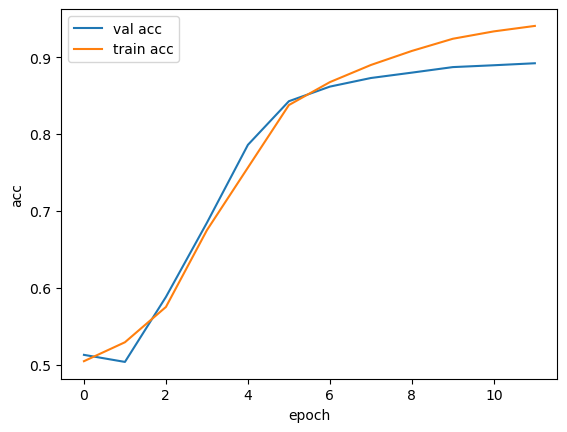

In [259]:
# Plot training and validation accuracies

plt.plot(fit_results.history['val_acc'],label="val acc")
plt.plot(fit_results.history['acc'],label="train acc")
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

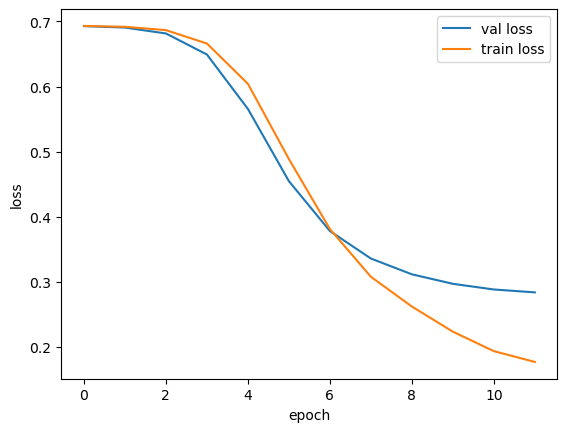

In [260]:
# Plot training and validation losses

plt.plot(fit_results.history['val_loss'],label="val loss")
plt.plot(fit_results.history['loss'],label="train loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [261]:
y_pred = model.predict(X_test)
print(y_pred)
y_pred = y_pred.reshape(-1,)
y_pred_binary = np.round(y_pred).astype(int)
y_pred_binary

782/782 [==============================] - 1s 1ms/step
[[0.9542652 ]
 [0.9987086 ]
 [0.97643083]
 ...
 [0.4665808 ]
 [0.19518825]
 [0.78690565]]


array([1, 1, 1, ..., 0, 0, 1])

In [262]:
y_test

array([1, 1, 1, ..., 0, 0, 0])

In [263]:
from sklearn.metrics import accuracy_score
print(f"Test Accuracy is: {accuracy_score(y_test, y_pred_binary) * 100}")

Test Accuracy is: 88.13600000000001


[[11116  1384]
 [ 1582 10918]]


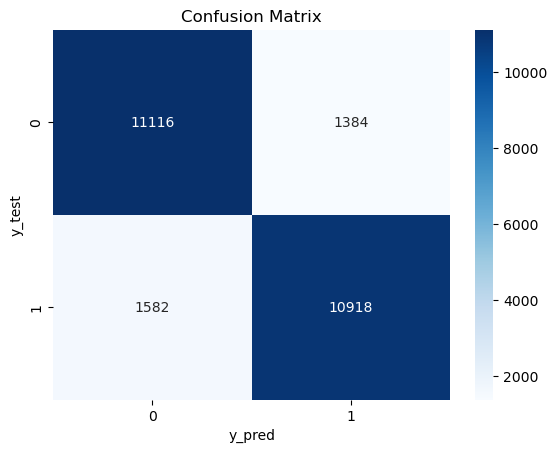

In [264]:
# Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_binary)
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix")
plt.show()